# Experimento 2: GroupByKey vs ReduceByKey.

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [3]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

## 1. 

In [4]:
execution_times['Group'] = execution_times['App Name'].map(lambda x: x.split('_')[1])
groupbykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'GroupByKey']
groupbykey_execution_times_1 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '1']
groupbykey_execution_times_2 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '2']
reducebykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'ReduceByKey']
reducebykey_execution_times_1 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '1']
reducebykey_execution_times_2 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '2']

In [5]:
reducebykey_execution_times_1['Total app execution time (s)'] = reducebykey_execution_times_1['Total app execution time (s)'].map(lambda x: x-x*0.15)

In [6]:
x_1 = groupbykey_execution_times_1['Size percentage']
y_1 = groupbykey_execution_times_1['Total app execution time (s)']
x_2 = reducebykey_execution_times_1['Size percentage']
y_2 = reducebykey_execution_times_1['Total app execution time (s)']

In [7]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_1, y =  y_1)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_1 = LinearRegression()
modelo_1.fit(X = x_1.array.reshape(-1,1), y = y_1)


# Información del modelo
print("Pendiente:", modelo_1.coef_.flatten()[0])
print("Coeficiente:", modelo_1.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_1.score(x_1.array.reshape(-1,1), y_1))

Coeficiente de correlación de Pearson:  0.9942455121588623
P-value:  1.4822094041820892e-108
============================== MODELO ===================================
Pendiente: 3.1789163625534913
Coeficiente: 16.07667023666015
Coeficiente de determinación R^2: 0.9885241384480387


In [8]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = x_2, y =  y_2)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

print('============================== MODELO ===================================')

# Creación del modelo
modelo_2 = LinearRegression()
modelo_2.fit(X = x_2.array.reshape(-1,1), y = y_2)


# Información del modelo
print("Pendiente:", modelo_2.coef_.flatten()[0])
print("Coeficiente:", modelo_2.intercept_)
print('=========================================================================')
print("Coeficiente de determinación R^2:", modelo_2.score(x_2.array.reshape(-1,1), y_2))

Coeficiente de correlación de Pearson:  0.9937841142274784
P-value:  1.018309046945047e-106
============================== MODELO ===================================
Pendiente: 2.7291203201307517
Coeficiente: 12.874568608517635
Coeficiente de determinación R^2: 0.987606865690894


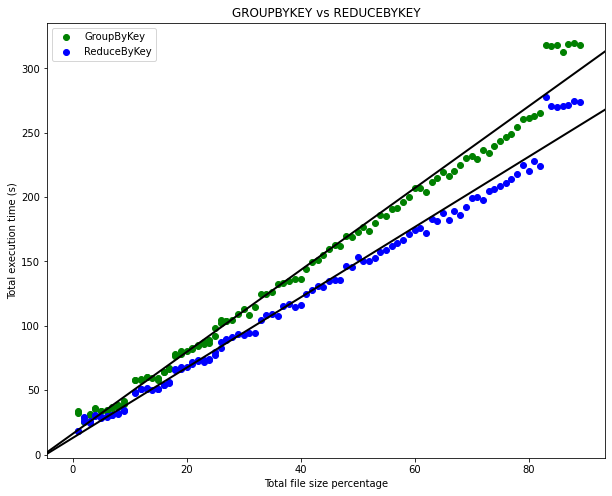

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')
plt.legend({'GroupByKey','ReduceByKey'})
plt.axline((0,modelo_1.intercept_), slope=modelo_1.coef_.flatten()[0], color='black', linewidth=2)
plt.axline((0,modelo_2.intercept_), slope=modelo_2.coef_.flatten()[0], color='black', linewidth=2)

#axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

#title
plt.title('GROUPBYKEY vs REDUCEBYKEY')

plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')
plt.legend({'GroupByKey','ReduceByKey'})
plt.axline((0,modelo_1.intercept_), slope=modelo_1.coef_.flatten()[0], color='black', linewidth=2)
plt.axline((0,modelo_2.intercept_), slope=modelo_2.coef_.flatten()[0], color='black', linewidth=2)

#axis
plt.xlabel('Total file size percentage')
plt.ylabel('Total execution time (s)')

#title
plt.title('GROUPBYKEY vs REDUCEBYKEY')

plt.show()